In [1]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.feature_extraction import stop_words
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import time
import numpy as np
from datetime import datetime, timedelta


In [114]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words



In [3]:
import requests
import bs4
import os

base_url = "http://www.presidency.ucsb.edu/"
speech_list = "http://www.presidency.ucsb.edu/2016_election_speeches.php?candidate=45&campaign=2016TRUMP&doctype=5000"
if not os.path.isdir('data'):
   os.mkdir('data')



# Grab page
res = requests.get(speech_list)
scrape = bs4.BeautifulSoup(res.text, 'lxml')
elements1 = scrape.select('td.listdate')
links1 = []
for i in elements1:
  links1.append(i.text)
links2 =[]
links2.append(links1[1::3])
elems = scrape.select('td.listdate a')
links = []

for e in elems:
    links.append((e.text, e.attrs['href']))
speeches = []
for idx, link in enumerate(links):
#     print("Grabbing speech: ", idx + 1)
    url = base_url + link[1][3:]
    res = requests.get(url)
    scrape = bs4.BeautifulSoup(res.text, 'lxml')
    speech = scrape.select('span.displaytext')[0].text.encode('utf-8')
    speeches.append(speech)

d = {'title' : pd.Series([l for l in links]),
     'dates' : pd.Series(links2[0]),
     'link' : pd.Series([base_url + l[1][3:] for l in links]),
     'speech': pd.Series(speeches)}
df = pd.DataFrame(d)
df = df.drop(['link', 'title'], 1)




In [4]:
trump_df = df
trump_df.head()

,dates,speech
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...
1,"March 21, 2016",b' Good evening. Thank you very much. I speak ...
2,"April 27, 2016",b'Thank you for the opportunity to speak to yo...
3,"June 13, 2016",b'Thank you for joining me today.This was goin...
4,"June 22, 2016",b'Today I\'d like to share my thoughts about t...


In [115]:
dijsselbloem_df = pd.read_csv("Dijsselbloem.csv")



In [116]:
statement_df = pd.read_csv("statement.csv")
statement_df.tail(2)

,Speaker,date,speech,Link
37,Common,05.22.2017,The Eurogroup welcomed the preliminary agreeme...,http://www.consilium.europa.eu/en/meetings/eur...
38,Common,06.15.2017,The Eurogroup finalised its discussion on the ...,http://www.consilium.europa.eu/en/meetings/eur...


In [117]:
regling_df = pd.read_csv("regling.csv")
regling_df = regling_df.drop(regling_df.index[-9:])


In [118]:
moscovici_df = pd.read_csv("Moscovici_English.csv")

In [119]:
mosco_fr = pd.read_csv("Moscovici_french.csv")



In [120]:
moscovici_df = pd.concat([mosco_fr, moscovici_df], ignore_index=True)



In [121]:
dijsselbloem_df.tail()

,Speaker,date,speech
35,Jeroen Dijsselbloem,02.20.2017,Let me come quickly to the topic that probably...
36,Jeroen Dijsselbloem,03.20.2017,Let me start with our discussion on Greece. We...
37,Jeroen Dijsselbloem,04.07.2017,Let me start with Greece. We have achieved sig...
38,Jeroen Dijsselbloem,06.22.2017,"I will only speak about Greece, because I thin..."
39,Jeroen Dijsselbloem,06.15.2017,"Our meeting revolved mainly around Greece, and..."


In [10]:
moscovici_df.tail()

,Speaker,date,speech,Link
18,Pierre Moscovici,11.17.2015,The Greek authorities and the institutions hav...,http://europa.eu/rapid/press-release_STATEMENT...
19,Pierre Moscovici,02.11.2016,Now a word on Greece.\nOur winter forecast las...,http://europa.eu/rapid/press-release_SPEECH-16...
20,Pierre Moscovici,10.10.2016,Thank you Jeroen. Bonsoir à toutes et à tous. ...,http://europa.eu/rapid/press-release_SPEECH-16...
21,Pierre Moscovici,02.20.2017,The further fiscal measures to be pre-legislat...,http://europa.eu/rapid/press-release_SPEECH-17...
22,Pierre Moscovici,05.02.2017,"""The agreement reached overnight in Athens on ...",http://europa.eu/rapid/press-release_STATEMENT...


In [11]:
regling_df.tail()

,Speaker,date,speech,Link
7,Klaus Regling,03.20.2017,Just a few words on Greece from the ESM perspe...,https://www.esm.europa.eu/press-releases/klaus...
8,Klaus Regling,04.07.2017,"But of course, Greece was important and I shar...",https://www.esm.europa.eu/press-releases/klaus...
9,Klaus Regling,05.23.2017,"There was progress, and I think it’s really go...",https://www.esm.europa.eu/press-releases/klaus...
10,Klaus Regling,06.12.2017,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/klaus...
11,Klaus Regling,07.10.2017,"Let me start with Greece, which was not on the...",https://www.esm.europa.eu/press-releases/klaus...


In [122]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df['stemmed'] = emolex_df.word.apply(lambda word: TextBlob(word).tokens[0].stem())
emolex_stemmed_df = emolex_df.drop_duplicates(subset=['stemmed'])
emolex_stemmed_df
emolex_stemmed_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,stemmed
0,aback,0,0,0,0,0,0,0,0,0,0,aback
1,abacus,0,0,0,0,0,0,0,0,0,1,abacu
2,abandon,0,0,0,1,0,1,0,1,0,0,abandon
5,abate,0,0,0,0,0,0,0,0,0,0,abat
7,abba,0,0,0,0,0,0,1,0,0,0,abba


In [13]:
regling_df.tail()


,Speaker,date,speech,Link
7,Klaus Regling,03.20.2017,Just a few words on Greece from the ESM perspe...,https://www.esm.europa.eu/press-releases/klaus...
8,Klaus Regling,04.07.2017,"But of course, Greece was important and I shar...",https://www.esm.europa.eu/press-releases/klaus...
9,Klaus Regling,05.23.2017,"There was progress, and I think it’s really go...",https://www.esm.europa.eu/press-releases/klaus...
10,Klaus Regling,06.12.2017,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/klaus...
11,Klaus Regling,07.10.2017,"Let me start with Greece, which was not on the...",https://www.esm.europa.eu/press-releases/klaus...


In [123]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(dijsselbloem_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(trump_df['speech'])
vocab = vec.get_feature_names()
wordcount_df4 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df4.head()



NameError: name 'trump_df' is not defined

In [125]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(statement_df['speech'])
vocab = vec.get_feature_names()
wordcount_df3 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df3.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False, 
                      tokenizer=textblob_tokenizer,
                      stop_words='english',

                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(moscovici_df['speech'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [127]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      tokenizer=textblob_tokenizer,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df2 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df2.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
dijsselbloem_df['positivity'] = wordcount_df1[positive_words].sum(axis=1)

negative_words = emolex_stemmed_df[emolex_stemmed_df.negative == 1].stemmed
dijsselbloem_df['negativity'] = wordcount_df1[negative_words].sum(axis=1)

trust_words = emolex_stemmed_df[emolex_stemmed_df.trust == 1].stemmed
dijsselbloem_df['trust'] = wordcount_df1[trust_words].sum(axis=1)

surprise_words = emolex_stemmed_df[emolex_stemmed_df.surprise == 1].stemmed
dijsselbloem_df['surprise'] = wordcount_df1[surprise_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
dijsselbloem_df['anger'] = wordcount_df1[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
dijsselbloem_df['anticipation'] = wordcount_df1[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
dijsselbloem_df['disgust'] = wordcount_df1[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
dijsselbloem_df['fear'] = wordcount_df1[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
dijsselbloem_df['joy'] = wordcount_df1[joy].sum(axis=1)






In [129]:
dijsselbloem_df.reset_index(inplace=True)
dijsselbloem_df['date'] = pd.to_datetime(dijsselbloem_df['date'], format="%m.%d.%Y")
dijsselbloem_df.set_index('date', inplace=True)
dijsselbloem_df.tail()

,index,Speaker,speech,positivity,negativity,trust,surprise,anger,anticipation,disgust,fear,joy
date,,,,,,,,,,,,
2017-02-20,35,Jeroen Dijsselbloem,Let me come quickly to the topic that probably...,0.266667,0.058333,0.216667,0.033333,0.008333,0.116667,0.000000,0.041667,0.050000
2017-03-20,36,Jeroen Dijsselbloem,Let me start with our discussion on Greece. We...,0.222222,0.022222,0.155556,0.022222,0.000000,0.155556,0.000000,0.000000,0.066667
2017-04-07,37,Jeroen Dijsselbloem,Let me start with Greece. We have achieved sig...,0.264463,0.024793,0.173554,0.008264,0.000000,0.099174,0.000000,0.016529,0.049587
2017-06-22,38,Jeroen Dijsselbloem,"I will only speak about Greece, because I thin...",0.190789,0.118421,0.098684,0.019737,0.013158,0.125000,0.000000,0.006579,0.046053
2017-06-15,39,Jeroen Dijsselbloem,"Our meeting revolved mainly around Greece, and...",0.273438,0.058594,0.183594,0.023438,0.015625,0.078125,0.015625,0.039062,0.050781


In [131]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
moscovici_df['positivity'] = wordcount_df[positive_words].sum(axis=1)

negative_words = emolex_stemmed_df[emolex_stemmed_df.negative == 1].stemmed
moscovici_df['negativity'] = wordcount_df[negative_words].sum(axis=1)

trust_words = emolex_stemmed_df[emolex_stemmed_df.trust == 1].stemmed
moscovici_df['trust'] = wordcount_df[trust_words].sum(axis=1)

surprise_words = emolex_stemmed_df[emolex_stemmed_df.surprise == 1].stemmed
moscovici_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)



angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
moscovici_df['anger'] = wordcount_df[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
moscovici_df['anticipation'] = wordcount_df[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
moscovici_df['disgust'] = wordcount_df[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
moscovici_df['fear'] = wordcount_df[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
moscovici_df['joy'] = wordcount_df[joy].sum(axis=1)







In [132]:
moscovici_df.reset_index(inplace=True)
moscovici_df['date'] = pd.to_datetime(moscovici_df['date'], format="%m.%d.%Y")

moscovici_df.set_index('date', inplace=True)
moscovici_df.head()

,index,Speaker,speech,Link,positivity,negativity,trust,surprise,anger,anticipation,disgust,fear,joy
date,,,,,,,,,,,,,
2015-09-12,0,Pierre Moscovici,Je commence par un mot sur la Grèce et sur Chy...,http://europa.eu/rapid/press-release_SPEECH-15...,0.092105,0.065789,0.065789,0.013158,0.013158,0.026316,0.000000,0.000000,0.000000
2015-11-09,1,Pierre Moscovici,Merci Jeroen. \nJ’ai effectivement informé l’E...,http://europa.eu/rapid/press-release_SPEECH-15...,0.337349,0.072289,0.072289,0.024096,0.024096,0.036145,0.048193,0.036145,0.036145
2015-11-23,2,Pierre Moscovici,Je vais être très bref car Jeroen a dit l'esse...,http://europa.eu/rapid/press-release_STATEMENT...,0.318182,0.068182,0.090909,0.022727,0.000000,0.136364,0.045455,0.022727,0.022727
2015-12-07,3,Pierre Moscovici,Je vais commencer par quelques mots sur la Grè...,http://europa.eu/rapid/press-release_SPEECH-15...,0.206897,0.034483,0.172414,0.034483,0.017241,0.068966,0.017241,0.034483,0.068966
2016-01-14,4,Pierre Moscovici,"Tout d’abord, mes meilleurs vœux à chacune et ...",http://europa.eu/rapid/press-release_SPEECH-16...,0.253333,0.053333,0.120000,0.066667,0.013333,0.026667,0.000000,0.013333,0.013333


In [133]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
regling_df['positivity'] = wordcount_df2[positive_words].sum(axis=1)

negative_words = emolex_stemmed_df[emolex_stemmed_df.negative == 1].stemmed
regling_df['negativity'] = wordcount_df2[negative_words].sum(axis=1)

trust_words = emolex_stemmed_df[emolex_stemmed_df.trust == 1].stemmed
regling_df['trust'] = wordcount_df2[trust_words].sum(axis=1)

surprise_words = emolex_stemmed_df[emolex_stemmed_df.surprise == 1].stemmed
regling_df['surprise'] = wordcount_df2[surprise_words].sum(axis=1)



angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
regling_df['anger'] = wordcount_df2[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
regling_df['anticipation'] = wordcount_df2[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
regling_df['disgust'] = wordcount_df2[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
regling_df['fear'] = wordcount_df2[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
regling_df['joy'] = wordcount_df2[joy].sum(axis=1)








In [134]:
regling_df.reset_index(inplace=True)
regling_df['date'] = pd.to_datetime(regling_df['date'], format="%m.%d.%Y")
regling_df.set_index('date', inplace=True)
regling_df.head()

,index,Speaker,speech,Link,positivity,negativity,trust,surprise,anger,anticipation,disgust,fear,joy
date,,,,,,,,,,,,,
2016-04-22,0,Klaus Regling,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/trans...,0.287037,0.092593,0.222222,0.083333,0.009259,0.148148,0.018519,0.027778,0.101852
2016-05-25,1,Klaus Regling,The Eurogroup welcomes that a full staff-level...,https://www.esm.europa.eu/press-releases/eurog...,0.204819,0.117040,0.151463,0.010327,0.017212,0.077453,0.017212,0.015491,0.036145
2016-10-10,2,Klaus Regling,Let me give you a few more details on the disb...,https://www.esm.europa.eu/press-releases/trans...,0.228571,0.107143,0.235714,0.021429,0.007143,0.121429,0.000000,0.000000,0.057143
2016-11-07,3,Klaus Regling,"On Greece, you’ve heard about the progress the...",https://www.esm.europa.eu/press-releases/trans...,0.182609,0.047826,0.126087,0.026087,0.030435,0.126087,0.000000,0.017391,0.086957
2016-12-05,4,Klaus Regling,"Good evening, let me say a few words about the...",https://www.esm.europa.eu/press-releases/trans...,0.166163,0.099698,0.102719,0.030211,0.021148,0.108761,0.009063,0.039275,0.066465


In [135]:
dijsselbloem_df = dijsselbloem_df.replace(np.NaN, 0)

In [136]:
moscovici_df = moscovici_df.replace(np.NaN, 0)

In [137]:
regling_df = regling_df.replace(np.NaN, 0)

In [139]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
statement_df['positivity'] = wordcount_df3[positive_words].sum(axis=1)

negative_words = emolex_stemmed_df[emolex_stemmed_df.negative == 1].stemmed
statement_df['negativity'] = wordcount_df3[positive_words].sum(axis=1)

trust_words = emolex_stemmed_df[emolex_stemmed_df.trust == 1].stemmed
statement_df['trust'] = wordcount_df3[positive_words].sum(axis=1)

surprise_words = emolex_stemmed_df[emolex_stemmed_df.surprise == 1].stemmed
statement_df['surprise'] = wordcount_df3[positive_words].sum(axis=1)



angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
statement_df['anger'] = wordcount_df3[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
statement_df['anticipation'] = wordcount_df3[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
statement_df['disgust'] = wordcount_df3[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
statement_df['fear'] = wordcount_df3[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
statement_df['joy'] = wordcount_df3[joy].sum(axis=1)








In [140]:
statement_df.reset_index(inplace=True)
statement_df['date'] = pd.to_datetime(statement_df['date'], format="%m.%d.%Y")
statement_df.set_index('date', inplace=True)
statement_df = statement_df.replace(np.NaN, 0)
statement_df.tail()

In [39]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
trump_df['positivity'] = wordcount_df4[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
trump_df['anger'] = wordcount_df4[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
trump_df['anticipation'] = wordcount_df4[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
trump_df['disgust'] = wordcount_df4[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
trump_df['fear'] = wordcount_df4[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
trump_df['joy'] = wordcount_df4[joy].sum(axis=1)







In [40]:
trump_df.head()

,dates,speech,positivity,anger,anticipation,disgust,fear,joy
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.117300
1,"March 21, 2016",b' Good evening. Thank you very much. I speak ...,0.259574,0.099291,0.130496,0.046809,0.136170,0.119149
2,"April 27, 2016",b'Thank you for the opportunity to speak to yo...,0.248569,0.077678,0.103843,0.031071,0.116926,0.096484
3,"June 13, 2016",b'Thank you for joining me today.This was goin...,0.192615,0.100798,0.063872,0.040918,0.151697,0.044910
4,"June 22, 2016",b'Today I\'d like to share my thoughts about t...,0.210010,0.080471,0.097154,0.042198,0.110893,0.076546


In [41]:
trump_df['dates'] = pd.to_datetime(trump_df['dates'], format="%B %d, %Y")
trump_df.set_index('dates', inplace=True)
trump_df = trump_df.replace(np.NaN, 0)

In [42]:
trump_df.head(1)

,speech,positivity,anger,anticipation,disgust,fear,joy
dates,,,,,,,
2015-06-16,b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.1173


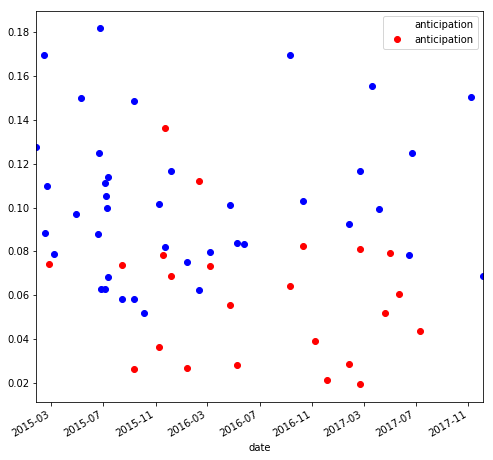

In [85]:
ax = dijsselbloem_df.plot(y='anticipation', marker='o', linestyle='', figsize=(8,8), c='blue')
moscovici_df.plot(y='anticipation', marker='o', linestyle='', c='red', ax=ax)

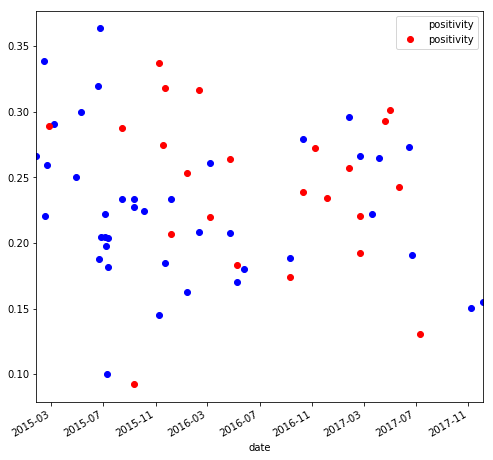

In [86]:
ax = dijsselbloem_df.plot(y='positivity', marker='o', linestyle='', figsize=(8,8), c='blue')
moscovici_df.plot(y='positivity', marker='o', linestyle='', c='red', ax=ax)

(0, 0.6)

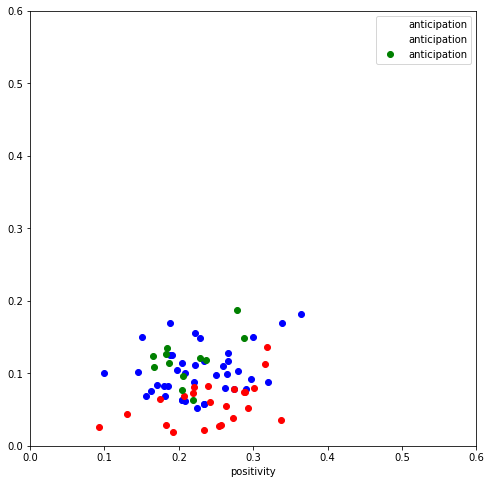

In [89]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='positivity', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='positivity', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='positivity', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='fear', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='fear', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='fear', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.3)
ax.set_ylim(0,0.3)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.3)
ax.set_ylim(0,0.3)

(0, 0.6)

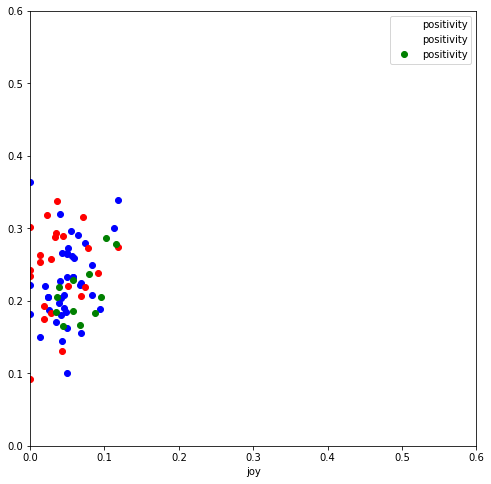

In [91]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df.head(1)

(0, 0.6)

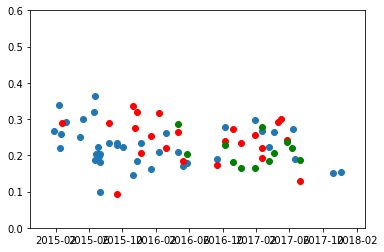

In [93]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)
ax.scatter(x= moscovici_df.index, y = moscovici_df.positivity, color='red')
ax.scatter(x= regling_df.index, y = regling_df.positivity, color='green')


ax.set_ylim(0,0.6)

(0, 0.6)

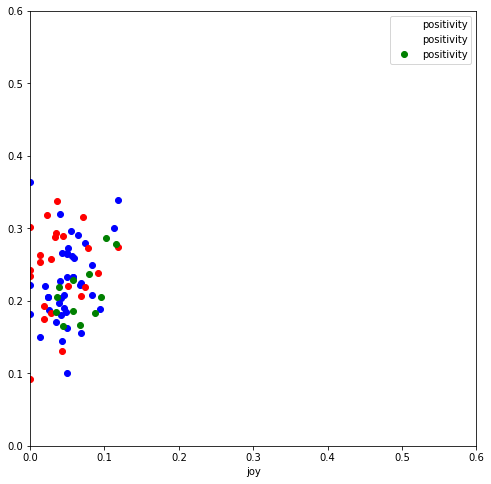

In [94]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df.head(1)

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='fear', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='fear', y='anticipation', c='red', ax=ax, marker='o', linestyle='')

ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df[0:20]

In [95]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 5 clusters usinga  (12, 11029) matrix
CPU times: user 141 ms, sys: 45.8 ms, total: 187 ms
Wall time: 291 ms


In [96]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
        ngram_range=(3,3),


                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(dijsselbloem_df['speech'][0:20])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 22.7 ms, sys: 4.11 ms, total: 26.8 ms
Wall time: 38.1 ms


In [97]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 5 clusters usinga  (20, 250) matrix
CPU times: user 88.1 ms, sys: 4.53 ms, total: 92.7 ms
Wall time: 90.7 ms


In [99]:
print("Top terms per cluster: dijsselbloem_df")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, '| '.join(top_ten_words)))

Top terms per cluster: dijsselbloem_df
Cluster 0: talks greek authorities| welcome press conference| expiry date current| governors formal decision| government worked hard
Cluster 1: area member states| euro area member| european central bank| statement issued following| people required following
Cluster 2: new greek government| july 2015 eurogroup| new esm programme| continue talks monday| institutions greek authorities
Cluster 3: gross financing needs| board consider financial| consider financial support| prior actions legislated| imf board consider
Cluster 4: basis successful conclusion| review like reiterate| comprehensive detailed list| reiterate agreement 20| institutions informed ongoing


In [100]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
    ngram_range=(3,3),
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(dijsselbloem_df['speech'][21:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 28.4 ms, sys: 2.5 ms, total: 30.9 ms
Wall time: 29.6 ms


In [101]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, '| '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: term medium term| work strands ahead| people intense efforts| personal income tax| permanent structural measures
Cluster 1: additional debt measures| particular course review| payment periods specific| quick return mission| possibilities profiling necessary
Cluster 2: positive definite conclusion| positive conclusion review| positive conclusions elements| medium term package| point want make
Cluster 3: play implementation programme| called greek authorities| level agreement soon| possible institutions said| play ongoing second
Cluster 4: asked esm management| primary surplus gdp| greek authorities implement| preparation mission continue| policies commission important


In [256]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
        ngram_range=(4,4),


                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][0:3])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 14.8 ms, sys: 988 µs, total: 15.7 ms
Wall time: 19.4 ms


In [257]:
print("Top terms per cluster: moscovici_df")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' |'.join(top_ten_words)))

Top terms per cluster: moscovici_df
Cluster 0: protections qui sont en |échanges avec les autorités |les institutions sur projet |ministre des finances et |ministre des finances chypriote
Cluster 1: assistance pour les réformes |le plan la situation |legislation sont évidemment étroitement |pour permettre que le |ou est en cours
Cluster 2: objectif dans les prochains |négligeables la deuxième est |négociateur nous avons notamment |la zone euro aspect |nous continuons travailler je
Cluster 3: notre intention commune il |la grèce pour ma |la semaine dernière et |particulier est la loi |nous aboutirons une fois
Cluster 4: il encore des discussions |points encore clôturer et |la question des crédits |permettrait le versement entre |nous devons maintenir le


In [258]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True,
                      ngram_range=(4,4))



# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][4:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 41.3 ms, sys: 1.3 ms, total: 42.6 ms
Wall time: 43.1 ms


In [260]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' |'.join(top_ten_words)))

Top terms per cluster:
Cluster 0: pour rassurer tous les |sur la deuxième revue |objectif sur la question |ouvrir la voie pour |ouvrir en grèce et
Cluster 1: accord dans les meilleurs |les jours qui viennent |nécessaire pour que la |plus tôt possible est |performing loan npl problem
Cluster 2: pensions health systems competition |pensions bank governance energy |pensions et le marché |impôt sur le revenu |passeront du soutien adoption
Cluster 3: page la croissance revient |au mécanisme européen stabilité |est plus que jamais |permis au mécanisme européen |paquet mesures très important
Cluster 4: article 13 esm treaty |pillars restoring fiscal sustainability |depuis notre dernière réunion |peut désormais ouvrir en |path overall agreement build


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][4:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [ ]:
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words



In [ ]:
regling_words = regling_df['speech'].apply(textblob_tokenizer)

In [ ]:
for word in regling_words:
    print("ORIGINAL:", word, "| LEMMA:", word.lemmatize(), "| STEM:", word.stem())


In [ ]:
# vec = TfidfVectorizer(vocabulary=emolex_df.word,
#                       tokenizer=textblob_tokenizer,
#                       use_idf=False,
#                       stop_words='english',
#                       norm='l1') # ELL - ONE
# matrix = vec.fit_transform(regling_df['speech'])
# vocab = vec.get_feature_names()
# wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
# wordcount_df1.head()

In [ ]:
emolex_df.word.head()

In [ ]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [ ]:
dijsselbloem_df.resample('m').head()

In [ ]:
dijsselbloem_df.resample('m').dropna().reset_index().plot(kind='scatter',x='date', y='positivity')

In [ ]:
dijsselbloem_df.resample('2w').dropna().reset_index().plot(y='positivity', x='index')

In [ ]:
dijsselbloem_df.head(1)

(0, 0.6)

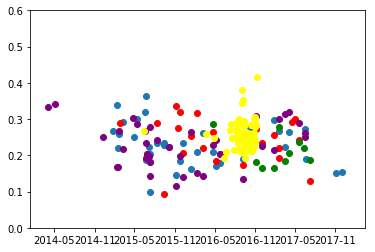

In [262]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)
ax.scatter(x= moscovici_df.index, y = moscovici_df.positivity, color='red')
ax.scatter(x= regling_df.index, y = regling_df.positivity, color='green')
ax.scatter(x= statement_df.index, y = statement_df.positivity, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.positivity, color='yellow')




ax.set_ylim(0,0.6)


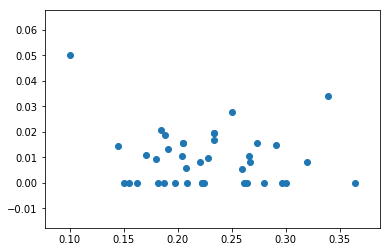

In [54]:
x = dijsselbloem_df.anger
y = dijsselbloem_df.positivity
fig, ax = plt.subplots()

ax.scatter(x= dijsselbloem_df.positivity, y = dijsselbloem_df.anger)

plt.show()

In [42]:
df.head(1)

,dates,speech,positivity,anger,anticipation,disgust,fear,joy
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.1173


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.anger)
ax.scatter(x= moscovici_df.index, y = moscovici_df.anger, color='red')
ax.scatter(x= regling_df.index, y = regling_df.anger, color='green')
ax.scatter(x= statement_df.index, y = statement_df.anger, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.anger, color='yellow')



ax.set_ylim(0,0.3)




In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.disgust)
ax.scatter(x= moscovici_df.index, y = moscovici_df.disgust, color='red')
ax.scatter(x= regling_df.index, y = regling_df.disgust, color='green')

ax.scatter(x= statement_df.index, y = statement_df.disgust, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.disgust, color='yellow')





ax.set_ylim(0,0.3)


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.joy)
ax.scatter(x= moscovici_df.index, y = moscovici_df.joy, color='red')
ax.scatter(x= regling_df.index, y = regling_df.joy, color='green')
ax.scatter(x= statement_df.index, y = statement_df.joy, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.joy, color='yellow')



ax.set_ylim(0,0.3)







In [ ]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')
ax.scatter(x= trump_df.index, y = trump_df.fear, color='yellow')


ax.set_ylim(0,0.3)




plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

NameError: name 'df_trump' is not defined

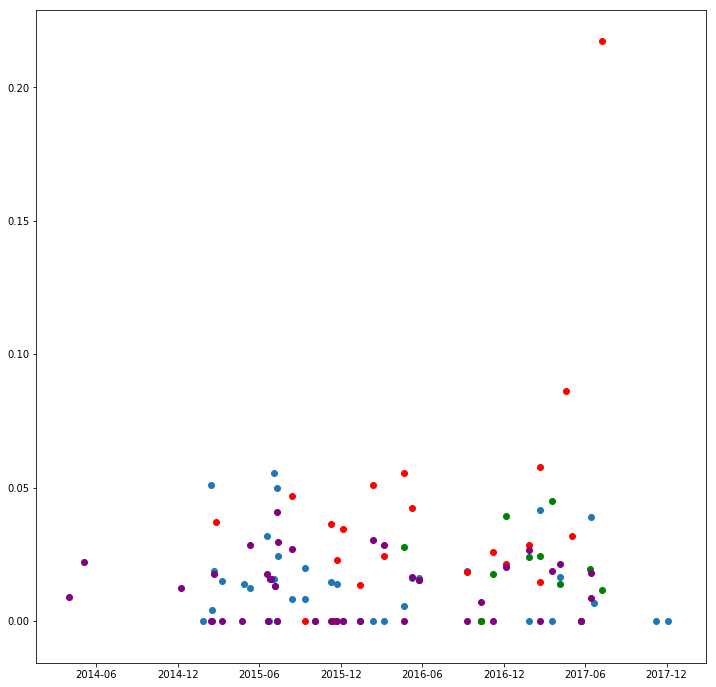

In [265]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.fear, color='yellow')


ax.set_ylim(0,0.3)




In [ ]:
moscovici_df.sort_values('disgust', ascending=False).head(2)

In [ ]:
moscovici_df.sort_values('fear', ascending=False).head(2)

TypeError: You must first set_array for mappable

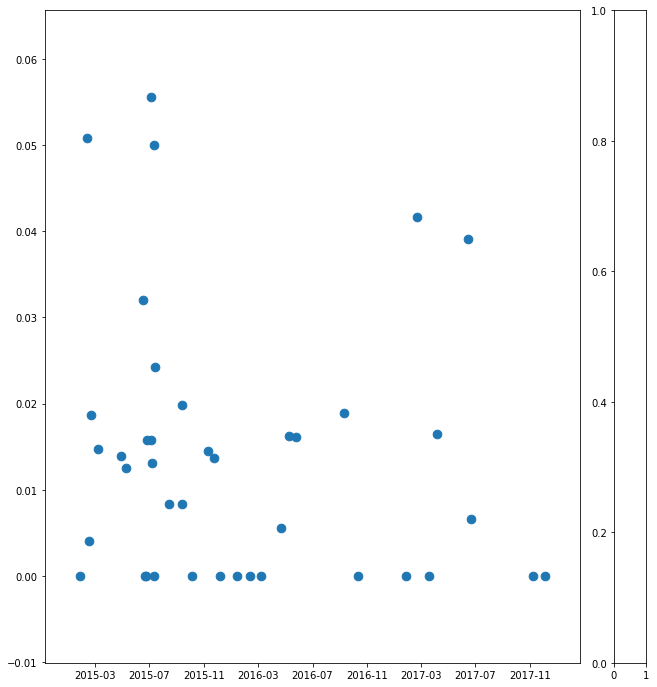

In [45]:
fig, ax = plt.subplots(figsize=(12,12))
points = plt.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear, s=75)

#points = plt.scatter(x = data['Date'], y = data["Words"], c=data["Words"], s=75, cmap="BrBG")

plt.colorbar(points)
sns.regplot(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, data=dijsselbloem_df, scatter=False, color='r')



AttributeError: 'DatetimeIndex' object has no attribute 'mean'

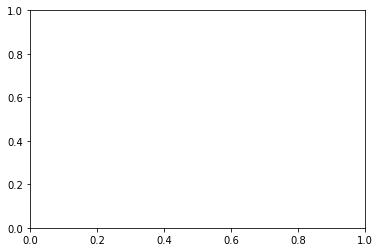

In [46]:
sns.regplot(x=dijsselbloem_df.index, y=dijsselbloem_df.fear, data=dijsselbloem_df);

TypeError: invalid type promotion

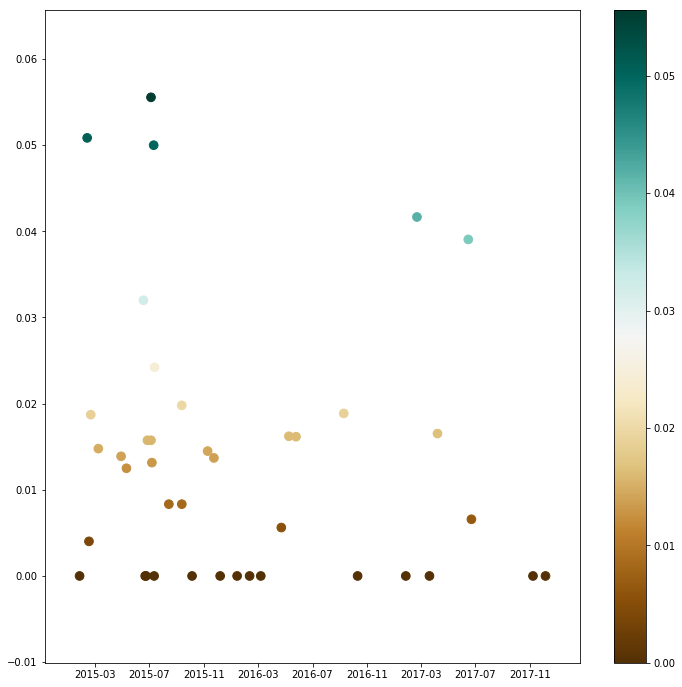

In [44]:

fig, ax = plt.subplots(figsize=(12,12))
points = plt.scatter(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, s=75, c=dijsselbloem_df.fear,  cmap="BrBG")

plt.colorbar(points)
sns.regplot(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, data=dijsselbloem_df, scatter=False, color='r',fit_reg=True)


ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(dijsselbloem_df.index).strftime('%Y-%m-%d %H:%M:%S') for x in xticks]

plt.plot(np.unique(points), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#xticks_dates = [dijsselbloem_df.index.strftime('%Y') for x in xticks]
ax.set_xticklabels(xticks_dates)
ax.set_ylim(0,0.3)



    # Add correlation line
#     axes = plt.gca()
#     m, b = np.polyfit(x, y, 1)
#     X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')


# fig, ax = plt.subplots(figsize=(12,12))
# ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
# ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
# ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
# ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')







# Dij

In [ ]:
dijsselbloem_df['date'] = dijsselbloem_df.index
dijsselbloem_df.dtypes
timechange = lambda x:x.timestamp()
dijsselbloem_df.date = dijsselbloem_df.date.apply((timechange))

# positivity

In [147]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.positivity,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.positivity)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.positivity)
        return ax





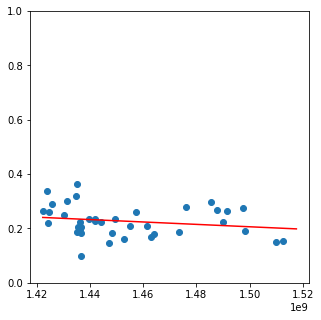

In [148]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.positivity)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()







# anger

In [149]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.anger,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.anger)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.anger)
        return ax






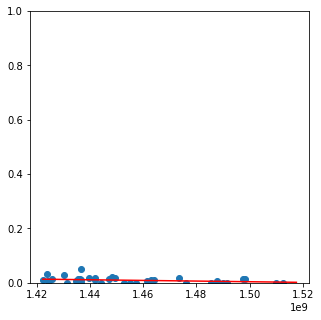

In [150]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.anger)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()








# anticipation

In [151]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.anticipation,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.anticipation)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.anticipation)
        return ax




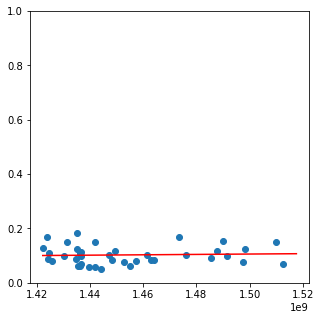

In [152]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.anticipation)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()






# Trust

In [153]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.trust,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.trust)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.trust)
        return ax





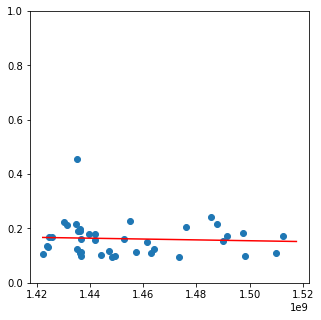

In [154]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.trust)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()







# Surprise

In [155]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.surprise,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.surprise)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.surprise)
        return ax






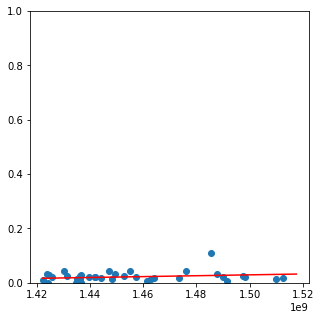

In [156]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.surprise)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()








# Fear

In [157]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.fear,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.fear)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.fear)
        return ax





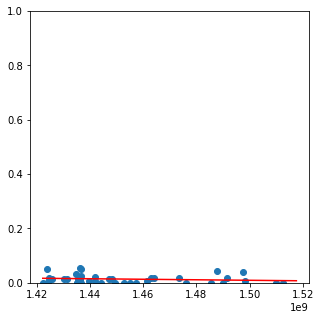

In [158]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.fear)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()







# Negativity

In [159]:
[m_1, b] = np.polyfit(dijsselbloem_df.date,dijsselbloem_df.negativity,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.negativity)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(dijsselbloem_df.date,dijsselbloem_df.negativity)
        return ax






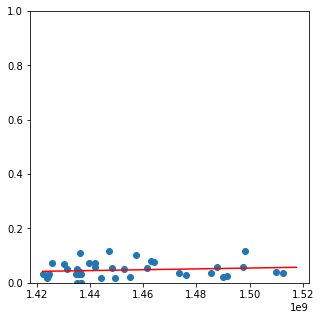

In [160]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(dijsselbloem_df.date,dijsselbloem_df.negativity)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()








# Moscovici

In [63]:
moscovici_df['date1'] = moscovici_df.index
moscovici_df.date = moscovici_df.date1.apply((timechange))

AttributeError: 'int' object has no attribute 'timestamp'

In [227]:
[m_1, b] = np.polyfit(moscovici_df.date,moscovici_df.positivity,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(moscovici_df.date,moscovici_df.positivity)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(moscovici_df.date,moscovici_df.positivity)
        return ax




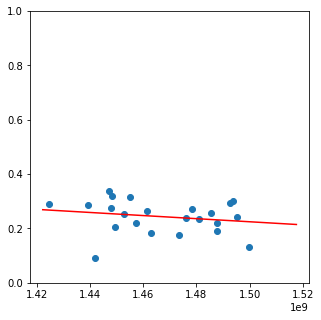

In [228]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(moscovici_df.date,moscovici_df.positivity)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()






Anticipation

In [229]:
[m_1, b] = np.polyfit(moscovici_df.date,moscovici_df.anticipation,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(moscovici_df.date,moscovici_df.anticipation)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(moscovici_df.date,moscovici_df.anticipation)
        return ax





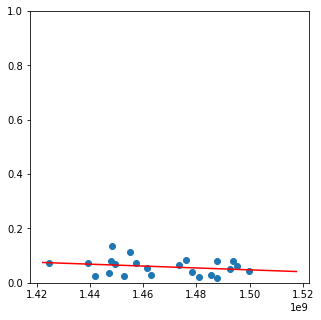

In [230]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(moscovici_df.date,moscovici_df.anticipation)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()







Fear

In [231]:
[m_1, b] = np.polyfit(moscovici_df.date,moscovici_df.fear,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(moscovici_df.date,moscovici_df.fear)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(moscovici_df.date,moscovici_df.fear)
        return ax




# plt.savefig("slope.pdf")



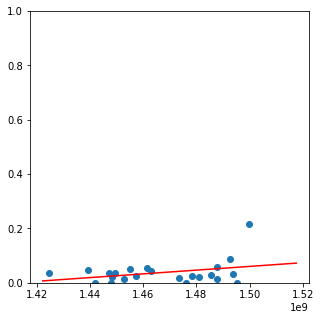

In [232]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(moscovici_df.date,moscovici_df.fear)
ax.plot(x_line, b + m_1*x_line, 'r')
ax
ax.set_ylim(0,1)
plt.show()








# Regling

In [245]:
timechange1 = lambda x:x.timestamp()
regling_df['date1'] = regling_df.index
regling_df.date1 = regling_df.date1.apply((timechange1))

Positive

In [247]:
[m_1, b] = np.polyfit(regling_df.date,regling_df.positivity,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(regling_df.date,regling_df.positivity)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(regling_df.date,regling_df.positivity)
        return ax





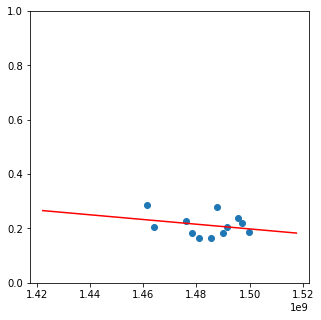

In [248]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(regling_df.date,regling_df.positivity)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()







Anticipation

In [249]:
[m_1, b] = np.polyfit(regling_df.date,regling_df.anticipation,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(regling_df.date,regling_df.anticipation)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(regling_df.date,regling_df.anticipation)
        return ax






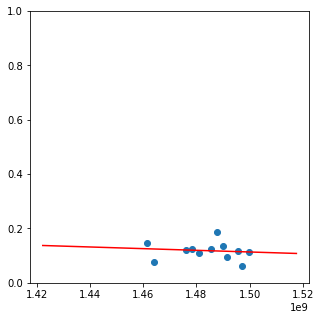

In [250]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(regling_df.date,regling_df.anticipation)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()








fear

In [251]:
[m_1, b] = np.polyfit(regling_df.date,regling_df.fear,1)


def plot_xy(x, y, color = 'blue', size = 1.0, ax = None):
    if ax:
        ax.scatter(regling_df.date,regling_df.fear)
    else:
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(regling_df.date,regling_df.fear)
        return ax







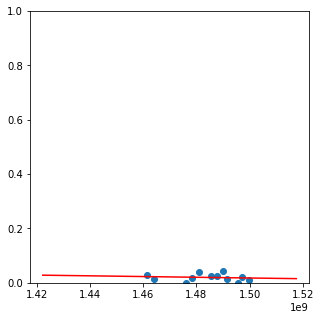

In [252]:
x_line = np.linspace(1.422248e+09, 1.517567e+09,1000)
ax = plot_xy(regling_df.date,regling_df.anticipation)
ax.plot(x_line, b + m_1*x_line, 'r')

ax.set_ylim(0,1)
plt.show()








In [ ]:
all = 